#### main experiments
TODO: switch to test eval!

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

def process_wandb_csv(raw_df):
    data = {}
    raw_df = raw_df.fillna(0)
    for column_name, column_data in raw_df.iteritems():
        if "alpaca" in column_name and "MAX" not in column_name and "MIN" not in column_name:
            perf = max(column_data)
            layer = int(column_name.split(".")[-4])
            token_id = int(column_name.split(".")[-2])
            data[(layer, token_id)] = perf
    return data

In [36]:
with open('./logs/eval_main_results.pkl', 'rb') as file:
    # Load the pickled object from the file
    loaded_object = pickle.load(file)
oracle_lb_data = loaded_object['lower_bound_alignment']
oracle_lub_data = loaded_object['both_bound_alignment']
control_midpoint_data = loaded_object['midpoint_alignment']
control_bracket_data = loaded_object['bracket_alignment']

In [37]:
df = pd.DataFrame(list(oracle_lb_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_oracle_lb_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(oracle_lub_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_oracle_lub_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(control_midpoint_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_control_midpoint_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(control_bracket_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_control_bracket_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

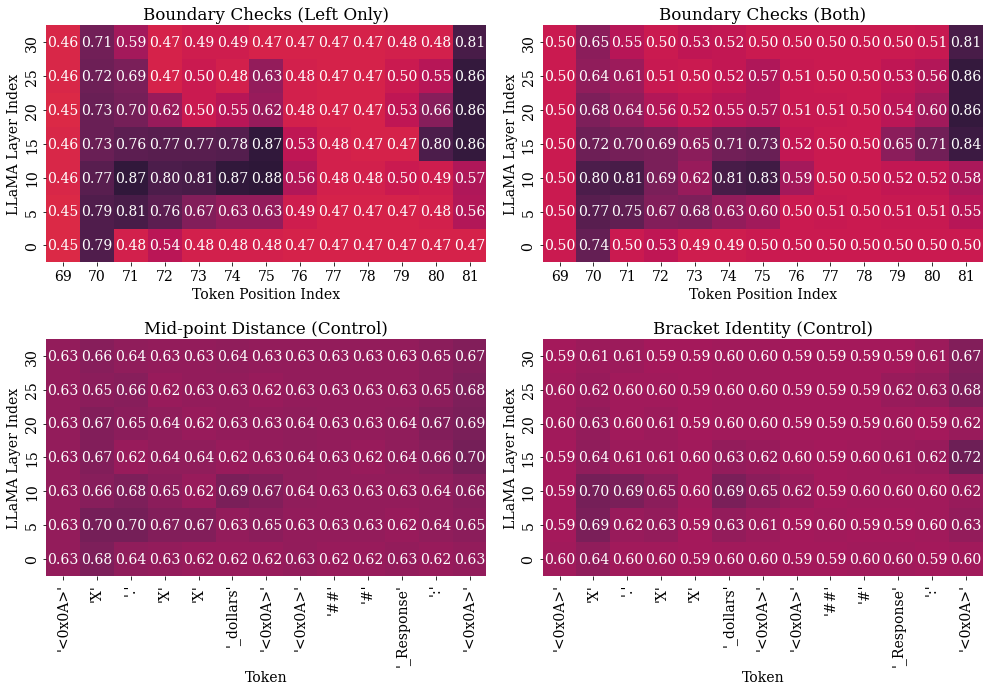

In [40]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(2, 2, figsize=(14, 10))
sns.heatmap(
    heatmap_oracle_lb_df, yticklabels=heatmap_oracle_lb_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0, 0]
)

sns.heatmap(
    heatmap_oracle_lub_df, yticklabels=heatmap_oracle_lub_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0, 1]
)

sns.heatmap(
    heatmap_control_midpoint_df, yticklabels=heatmap_control_midpoint_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1, 0],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

sns.heatmap(
    heatmap_control_bracket_df, yticklabels=heatmap_control_bracket_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1, 1],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)
ax[0, 0].set(xlabel='Token Position Index',
       ylabel='LLaMA Layer Index',
       title='Boundary Checks (Left Only)')
ax[0, 1].set(xlabel='Token Position Index',
       ylabel='LLaMA Layer Index',
       title='Boundary Checks (Both)')
ax[1, 0].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title='Mid-point Distance (Control)')
ax[1, 1].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title='Bracket Identity (Control)')

fig.tight_layout()
# plt.show()
plt.savefig("./logs/main-heatmap.svg", bbox_inches='tight')

#### Consistency Check

In [31]:
# Open the pickled file for binary reading
with open('./logs/eval_results_consistency.pkl', 'rb') as file:
    # Load the pickled object from the file
    loaded_object = pickle.load(file)
consistency_correct_data = loaded_object["correct_results"]
consistency_incorrect_data = loaded_object["incorrect_results"]
consistency_correct_data[(15, 69)] = 0.52
consistency_correct_data[(20, 69)] = 0.53
consistency_incorrect_data[(15, 69)] = 0.50
consistency_incorrect_data[(20, 69)] = 0.49

In [32]:
df = pd.DataFrame(list(consistency_correct_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_consistency_correct_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(consistency_incorrect_data.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_consistency_incorrect_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

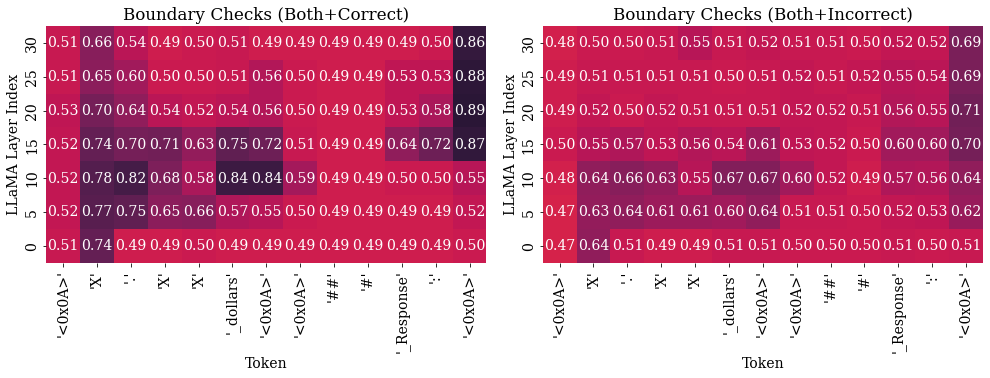

In [43]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_consistency_correct_df, yticklabels=heatmap_consistency_correct_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

sns.heatmap(
    heatmap_consistency_incorrect_df, yticklabels=heatmap_consistency_incorrect_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

ax[0].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title='Boundary Checks (Both+Correct)')
ax[1].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title='Boundary Checks (Both+Incorrect)')

fig.tight_layout()
# plt.show()
plt.savefig("./logs/calibration.svg", bbox_inches='tight')

#### Irrelevant Context

In [21]:
# Open the pickled file for binary reading
with open('./logs/eval_results_irrelevant_context.pkl', 'rb') as file:
    # Load the pickled object from the file
    loaded_object = pickle.load(file)
irrelevant_context_1 = loaded_object['Pricing tag game!']
irrelevant_context_2 = loaded_object['Fruitarian Frogs May Be Doing Flowers a Favor']
irrelevant_context_1[(15, 75)] = 0.53
irrelevant_context_1[(20, 75)] = 0.51
irrelevant_context_2[(15, 84)] = 0.48
irrelevant_context_2[(20, 84)] = 0.46

In [22]:
df = pd.DataFrame(list(irrelevant_context_1.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_context_1_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(irrelevant_context_2.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_context_2_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

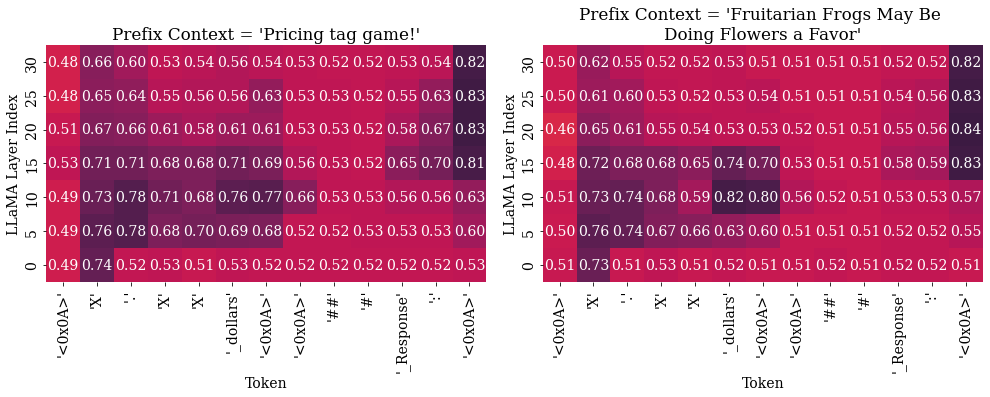

In [45]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_context_1_df, yticklabels=heatmap_context_1_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

sns.heatmap(
    heatmap_context_2_df, yticklabels=heatmap_context_2_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

ax[0].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title="Prefix Context = 'Pricing tag game!'")
ax[1].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title="Prefix Context = 'Fruitarian Frogs May Be \nDoing Flowers a Favor'")

fig.tight_layout()
# plt.show()
plt.savefig("./logs/irrelevant-context.svg", bbox_inches='tight')

#### Zero-shot between two tasks

In [47]:
# Open the pickled file for binary reading
with open('./logs/eval_zero_shot_results.pkl', 'rb') as file:
    # Load the pickled object from the file
    loaded_object = pickle.load(file)
original = loaded_object['original']
transfer = loaded_object['transfer']

In [48]:
df = pd.DataFrame(list(original.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_original_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(transfer.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_transfer_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

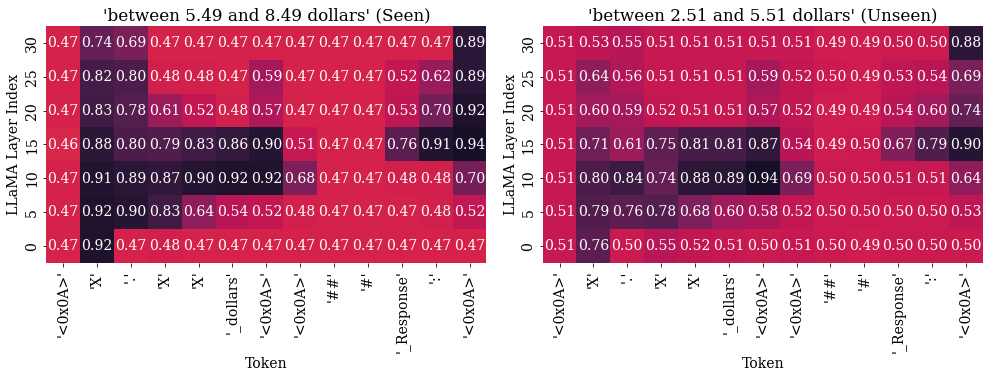

In [52]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_original_df, yticklabels=heatmap_original_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

sns.heatmap(
    heatmap_transfer_df, yticklabels=heatmap_transfer_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

ax[0].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title="'between 5.49 and 8.49 dollars' (Seen)")
ax[1].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title="'between 2.51 and 5.51 dollars' (Unseen)")

fig.tight_layout()
# plt.show()
plt.savefig("./logs/zeroshot-transfer.svg", bbox_inches='tight')

#### Zero-shot sibiling instruction transfer

In [53]:
# Open the pickled file for binary reading
with open('./logs/eval_different_return_results.pkl', 'rb') as file:
    # Load the pickled object from the file
    transfer = pickle.load(file)
with open('./logs/eval_main_results.pkl', 'rb') as file:
    # Load the pickled object from the file
    loaded_object = pickle.load(file)
original = loaded_object['both_bound_alignment']

In [54]:
df = pd.DataFrame(list(original.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_original_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

df = pd.DataFrame(list(transfer.items()), columns=['coord', 'value'])
# Split the coord column into separate columns
df[['LLaMA Layer Idx', 'Token Position Idx']] = pd.DataFrame(df['coord'].tolist(), index=df.index)
df['LLaMA Layer Idx'] = df['LLaMA Layer Idx'].max() - df['LLaMA Layer Idx']
# Reshape the DataFrame to have coordinates as columns
heatmap_transfer_df = df.pivot(index='LLaMA Layer Idx', columns='Token Position Idx', values='value')

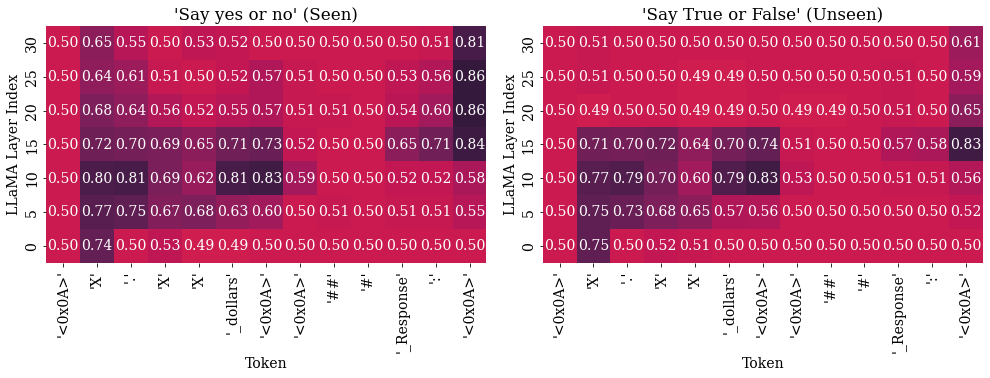

In [55]:
plt.rcParams["font.family"] = "DejaVu Serif"
font = {'family' : 'DejaVu Serif',
        'size'   : 14}
plt.rc('font', **font)

fig, ax = plt.subplots(1, 2, figsize=(14, 5.5))
sns.heatmap(
    heatmap_original_df, yticklabels=heatmap_original_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[0],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

sns.heatmap(
    heatmap_transfer_df, yticklabels=heatmap_transfer_df.index[::-1],
    annot=True, fmt='.2f', vmin=0.0, vmax=1.0, 
    cmap="rocket_r", square=True, cbar=False, ax=ax[1],
    xticklabels=["'<0x0A>'", "'X'", "'.'", "'X'", "'X'", 
                 "'_dollars'", "'<0x0A>'", 
                 "'<0x0A>'", "'##'", "'#'", 
                 "'_Response'", "':'", "'<0x0A>'"]
)

ax[0].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title="'Say yes or no' (Seen)")
ax[1].set(xlabel='Token',
       ylabel='LLaMA Layer Index',
       title="'Say True or False' (Unseen)")

fig.tight_layout()
# plt.show()
plt.savefig("./logs/different-return-transfer.svg", bbox_inches='tight')